In [1]:
import pandas as pd
import analysis_util
import matplotlib.pyplot as plt

In [2]:
all_chunks_attributes = pd.read_csv('data/dataset_attributes.csv')

In [28]:
df = pd.read_csv('data/resolution_composition.csv')
print(len(df))
df.head()

13573


,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0


In [29]:
df_po = pd.read_csv('data/partial_order_result.csv')
df = pd.merge(df, df_po, on='chunk_id', how='inner', suffixes=('', ''))
df.head()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5


In [30]:
malformed_chunks = pd.read_csv('data/malformed_chunks.csv')
malformed_chunks = malformed_chunks['chunk_id'].unique()
print(f'Removing {len(malformed_chunks)} malformed chunks')
df = df[~df['chunk_id'].isin(malformed_chunks)]
print(f'Total number of chunks: {len(df)}')

Removing 264 malformed chunks
Total number of chunks: 13309


In [31]:
# remove imprecise resolutions
df = df[df['v1_percentage']!= -1]
print(len(df))

10726


In [32]:
# remove implicit forks
df = analysis_util.filter_implicit_forks(df)
print(f'New total number of chunks: {len(df)}')

Total projects:  1082
Filtered 6 of 1082 projects for being implicit forks: {'adetaylor/android-frameworks-base-with-remote-control-service', 'RealVNC/android-frameworks-base-with-screenshot-tweaks', 'IceColdSandwich/android_frameworks_base', 'AOKP/frameworks_base_disabled', 'cgjones/android-frameworks-base', 'allwinner-ics/platform_frameworks_base'}
Total valid projects:  1076
New total number of chunks: 10177


In [33]:
df.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,1.017700e+04,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.000000,10177.00000,10177.000000,10177.000000,10177.000000,10177.000000
mean,1.097355e+06,0.55345,0.533306,0.510045,0.489930,0.086609,1.823622,2.175789,32.502489,36.404496,6.79493,6.965216,0.170286,15.298418,8.516164
std,2.119343e+05,0.31901,0.320762,0.304105,0.304072,0.198059,6.835704,10.463504,29.994432,30.863874,30.51060,33.251309,20.674248,68.754593,36.407157
min,7.766620e+05,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-388.000000,2.000000,1.000000
25%,9.398230e+05,0.33000,0.330000,0.330000,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,2.000000,-2.000000,4.000000,2.000000
50%,1.064856e+06,0.50000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,33.330000,40.000000,2.00000,3.000000,0.000000,6.000000,3.000000
75%,1.258354e+06,0.81000,0.800000,0.700000,0.670000,0.000000,1.000000,2.000000,50.000000,50.000000,5.00000,5.000000,2.000000,12.000000,7.000000
max,1.658666e+06,1.00000,1.000000,1.000000,1.000000,1.000000,353.000000,689.000000,100.000000,100.000000,1352.00000,1402.000000,1401.000000,2922.000000,1557.000000


In [34]:
all_attributes_selected = all_chunks_attributes[all_chunks_attributes['chunk_id'].isin(list(df['chunk_id']))]
all_attributes_selected

,chunk_id,developerdecision,line_start,line_end,line_separator,kind_conflict,url,project,project_user,project_name,...,Same devs,Devs intersection,Commits 1,Commits 2,Changed files 1,Changed files 2,Changed files intersection,self_conflict_perc,has_branch_merge_message_indicator,has_multiple_devs_on_each_side
1,776662,Combination,80,100,87,"If statement, Method invocation, Return statem...",https://github.com/3scale/3scale_ws_api_for_java,3scale/3scale_ws_api_for_java,3scale,3scale_ws_api_for_java,...,0.0,0.0,2.0,16.0,8.0,118.0,1.0,0.5,1.0,0.0
15,776782,Combination,77,193,123,"Attribute, Comment, If statement, Method decla...",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
16,776793,Combination,914,922,920,"Attribute, Method invocation",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,1.0,1.0,9.0,17.0,162.0,60.0,1.0,1.0,1.0,1.0
22,776828,Combination,295,302,299,Method invocation,https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,179.0,18.0,823.0,35.0,1.0,0.5,1.0,1.0
48,776863,Combination,136,144,138,"Method signature, Static initializer",https://github.com/cwensel/cascading,cwensel/cascading,cwensel,cascading,...,2.0,1.0,142.0,27.0,777.0,632.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173521,1652324,Combination,275,280,277,"Method signature, Try statement",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
173524,1652325,Combination,85,91,88,"If statement, Variable",https://github.com/gronnbeck/java-cluster-api,gronnbeck/java-cluster-api,gronnbeck,java-cluster-api,...,0.0,0.0,3.0,3.0,39.0,7.0,1.0,0.0,0.0,0.0
175600,1658634,Combination,47,62,56,Attribute,https://github.com/xargsgrep/PortKnocker,xargsgrep/PortKnocker,xargsgrep,PortKnocker,...,1.0,2.0,1.0,1.0,412.0,44.0,1.0,1.0,1.0,0.0
175687,1658665,Combination,9,15,12,Attribute,https://github.com/mseiwert/RoM,mseiwert/RoM,mseiwert,RoM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
kinds_conflict = []
for index, row in df.iterrows():
    chunk_id = row['chunk_id']
    kind_conflict = all_attributes_selected[all_attributes_selected['chunk_id']==chunk_id].iloc[0]['kind_conflict']
    kinds_conflict.append(kind_conflict)
df['kind_conflict'] = kinds_conflict
df

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12,"If statement, Method invocation, Return statem..."
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101,"Attribute, Comment, If statement, Method decla..."
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5,"Attribute, Method invocation"
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3,Method invocation
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5,"Method signature, Static initializer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0,True,3,2,"Method signature, Try statement"
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,2,"If statement, Variable"
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0,True,13,7,Attribute
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,3,Attribute


### How many of the conflicts in our dataset have just imports?

In [36]:
import_chunks = df[df['kind_conflict']=='Import'].copy()
import_chunks

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
8,776931,0.75,0.25,0.75,0.25,0.00,v1 v2,1,2,25.00,66.67,4,3,-1.0,True,7,4,Import
14,777042,0.00,1.00,0.00,1.00,0.00,v2,0,4,0.00,57.14,0,7,7.0,True,7,3,Import
34,777370,0.60,0.40,0.60,0.40,0.00,v1 v2 v1,0,0,0.00,0.00,3,2,-1.0,True,5,5,Import
43,777537,1.00,0.00,1.00,0.00,0.00,v1,0,0,0.00,0.00,4,0,-4.0,False,5,5,Import
52,777744,1.00,0.00,1.00,0.00,0.00,v1,1,0,33.33,0.00,3,0,-3.0,True,3,2,Import
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13415,1611128,0.50,0.67,0.42,0.58,0.17,v2 v1 v2 (v1_2) v1 v2,1,1,25.00,20.00,4,5,1.0,True,9,6,Import
13416,1611133,0.33,0.67,0.33,0.67,0.00,v1 v2,0,1,0.00,33.33,1,3,2.0,True,4,3,Import
13417,1611138,0.33,0.67,0.33,0.67,0.00,v1 v2,0,1,0.00,33.33,1,3,2.0,True,4,3,Import
13425,1610445,0.00,1.00,0.00,1.00,0.00,v2,0,1,0.00,50.00,0,2,2.0,True,2,1,Import


In [37]:
import_chunks.describe()

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,chunk_size,resolution_size
count,2.594000e+03,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000,2594.000000
mean,1.077816e+06,0.532062,0.525478,0.503273,0.496727,0.057436,1.066307,1.361604,28.778489,35.042124,2.847340,3.062452,0.215112,6.212413,3.375867
std,1.929392e+05,0.375868,0.376744,0.367627,0.367627,0.160469,2.308003,2.882639,30.928928,32.705387,3.674132,3.815848,4.895671,5.956908,3.605847
min,7.769310e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-77.000000,2.000000,1.000000
25%,9.420992e+05,0.170000,0.170000,0.140000,0.120000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-2.000000,3.000000,1.000000
50%,1.036478e+06,0.500000,0.500000,0.500000,0.500000,0.000000,1.000000,1.000000,25.000000,33.330000,2.000000,2.000000,0.000000,4.000000,2.000000
75%,1.159551e+06,1.000000,1.000000,0.880000,0.860000,0.000000,1.000000,1.000000,50.000000,50.000000,3.000000,4.000000,2.000000,7.000000,4.000000
max,1.611138e+06,1.000000,1.000000,1.000000,1.000000,1.000000,73.000000,81.000000,100.000000,100.000000,81.000000,82.000000,82.000000,85.000000,55.000000


In [38]:
print(f'{(len(import_chunks)/len(df))*100}%')

25.488847401002264%


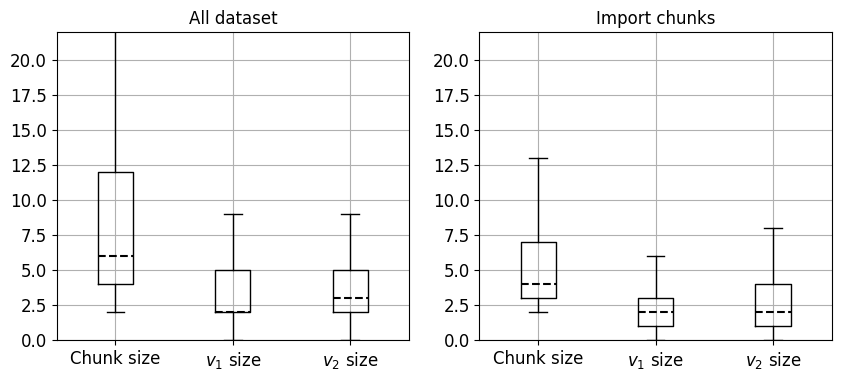

In [39]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[0], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[0].tick_params(axis="x", labelsize=12)
ax[0].tick_params(axis="y", labelsize=12)
ax[0].set_ylim(0, 22)
ax[0].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[0].set_title('All dataset')

import_chunks.boxplot(['chunk_size', 'v1_size', 'v2_size'], showfliers=False, ax=ax[1], color = 'k', medianprops=dict(linestyle='--', linewidth=1.5, color='k'))
ax[1].tick_params(axis="x", labelsize=12)
ax[1].tick_params(axis="y", labelsize=12)
ax[1].set_ylim(0, 22)
ax[1].set_xticklabels(['Chunk size', '$v_{1}$ size', '$v_{2}$ size'])
ax[1].set_title('Import chunks')

plt.show()

### What about the remaining chunks? What is the distribution of their kind?

In [40]:
not_import_chunks = df[df['kind_conflict']!='Import']
not_import_chunks

,chunk_id,v1_percentage,v2_percentage,normalized_v1_percentage,normalized_v2_percentage,intersection_percentage,chunk_composition,missing_v1_lines,missing_v2_lines,missing_v1_lines_perc,missing_v2_lines_perc,v1_size,v2_size,chunk_size_delta,partial_order,chunk_size,resolution_size,kind_conflict
0,776662,0.42,0.92,0.25,0.75,0.33,v1 v2 (v1_2) v1 (v1_2) v1 v2,1,1,16.67,8.33,6,12,6.0,True,18,12,"If statement, Method invocation, Return statem..."
1,776782,0.57,0.75,0.41,0.59,0.32,v2 v1 (v1_2) v1 (v1_2) v1 (v1_2) v2 (v1_2) v2...,2,4,6.06,7.55,33,53,20.0,True,113,101,"Attribute, Comment, If statement, Method decla..."
2,776793,0.75,0.25,0.75,0.25,0.00,v2 v1,1,0,25.00,0.00,4,1,-3.0,True,6,5,"Attribute, Method invocation"
3,776828,0.33,0.67,0.33,0.67,0.00,v2 v1 v2,2,0,66.67,0.00,3,2,-1.0,True,5,3,Method invocation
4,776863,0.25,0.75,0.25,0.75,0.00,v2 v1,0,1,0.00,25.00,1,4,3.0,True,6,5,"Method signature, Static initializer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13432,1652324,0.50,0.50,0.50,0.50,0.00,v1 v2,0,1,0.00,50.00,1,2,1.0,True,3,2,"Method signature, Try statement"
13433,1652325,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,2,"If statement, Variable"
13566,1658634,0.71,0.71,0.50,0.50,0.43,v2 (v1_2) v1 (v1_2) v2,2,0,28.57,0.00,7,5,-2.0,True,13,7,Attribute
13567,1658665,0.50,0.50,0.50,0.50,0.00,v2 v1,1,1,50.00,50.00,2,2,0.0,True,4,3,Attribute


In [41]:
df['kind_conflict'].value_counts(normalize=True).head(20)

Import                                                0.254888
Method invocation, Variable                           0.066424
Method invocation                                     0.053650
Attribute, Method invocation                          0.037044
Attribute                                             0.031738
If statement, Method invocation, Variable             0.026236
If statement, Method invocation                       0.025155
Comment, Method invocation, Variable                  0.015329
Comment                                               0.015230
Comment, Method invocation                            0.015230
Attribute, Comment                                    0.015034
Method invocation, Method signature                   0.011890
Annotation, Method signature                          0.010219
Comment, If statement, Method invocation, Variable    0.010219
Method invocation, Method signature, Variable         0.010023
Method declaration, Method signature                  0

### What is the percentage of chunks that violate the partial order for the top 10  most frequent kinds of conflict?

In [45]:
df[df['kind_conflict']=='Method invocation']['partial_order'].value_counts()

True     545
False      1
Name: partial_order, dtype: int64

In [49]:
kinds_frequent = list(df['kind_conflict'].value_counts(normalize=True).head(10).index)
kinds_frequent

['Import',
 'Method invocation, Variable',
 'Method invocation',
 'Attribute, Method invocation',
 'Attribute',
 'If statement, Method invocation, Variable',
 'If statement, Method invocation',
 'Comment, Method invocation, Variable',
 'Comment',
 'Comment, Method invocation']

In [59]:
data = []
for kind_conflict in df['kind_conflict'].unique():
    chunks = df[df['kind_conflict']==kind_conflict]
    violate_count = len(chunks[chunks['partial_order']=='False'])
    perc_violation = (violate_count / len(chunks)) * 100
    data.append([kind_conflict, perc_violation, len(chunks)])

In [61]:
df_data = pd.DataFrame(data, columns=['kind_conflict', 'percentage violation', 'chunks'])

In [64]:
df_data[df_data['chunks']>10].sort_values('percentage violation', ascending=False).head(20)

,kind_conflict,percentage violation,chunks
242,"Class declaration, Comment, Import, Package de...",36.363636,11
33,"Method declaration, Method invocation, Method ...",13.333333,15
107,"Comment, For statement, If statement, Method i...",12.500000,24
123,"Attribute, Class signature, Import",9.090909,11
22,"Attribute, Comment, If statement, Method invoc...",8.333333,12
151,"Comment, If statement",7.142857,28
215,"Annotation, Method declaration, Method invocat...",7.142857,28
177,"Annotation, Comment, Method declaration",6.818182,44
94,"For statement, Method invocation, Variable",6.122449,49
12,"Annotation, Method declaration",4.918033,61


In [65]:
v1v2 = analysis_util.get_chunk_composition_pattern_data('v1 v2', df)
v2v1 = analysis_util.get_chunk_composition_pattern_data('v2 v1', df)
v1_only = analysis_util.get_chunk_composition_pattern_data('v1', df)
v2_only = analysis_util.get_chunk_composition_pattern_data('v2', df)

In [67]:
v1_only['kind_conflict'].value_counts(normalize=True).head(20)

Import                                           0.451353
Method invocation                                0.047549
Attribute                                        0.046086
Attribute, Method invocation                     0.044623
Method invocation, Variable                      0.035845
Attribute, Comment                               0.025604
Comment, Method invocation                       0.021946
Method declaration                               0.018288
Comment, Method invocation, Variable             0.013899
If statement, Method invocation                  0.011704
Comment, Method declaration                      0.010973
Comment, Import                                  0.010241
Other                                            0.010241
Variable                                         0.009510
Annotation, Comment, Method declaration          0.009510
Annotation, Method declaration                   0.008778
Comment                                          0.008778
Annotation, At

In [68]:
v2_only['kind_conflict'].value_counts(normalize=True).head(20)

Import                                       0.477778
Method invocation, Variable                  0.034127
Attribute                                    0.033333
Method invocation                            0.033333
Attribute, Method invocation                 0.031746
Method declaration                           0.019048
Attribute, Comment                           0.019048
Comment, Method declaration                  0.019048
Annotation, Method declaration               0.016667
If statement, Method invocation              0.015873
Comment                                      0.015079
Method declaration, Method signature         0.013492
Comment, Method invocation                   0.012698
Comment, Method invocation, Variable         0.011905
If statement, Method invocation, Variable    0.011111
Annotation, Comment, Method declaration      0.011111
Comment, Import                              0.009524
Comment, Method signature                    0.007143
Attribute, Comment, Method i

In [69]:
v1v2['kind_conflict'].value_counts(normalize=True).head(20)

Import                                           0.209189
Method invocation, Variable                      0.104968
Method invocation                                0.079193
Attribute, Method invocation                     0.055286
Attribute                                        0.047441
If statement, Method invocation, Variable        0.028764
If statement, Method invocation                  0.023534
Comment, Method invocation, Variable             0.017183
Method invocation, Method signature, Variable    0.015689
Attribute, Comment                               0.015316
Attribute, Comment, Method invocation            0.013448
Attribute, Method invocation, Variable           0.013448
Comment, Method invocation                       0.013448
If statement                                     0.013074
Method declaration, Method signature             0.011954
Other                                            0.011207
Variable                                         0.011207
Method invocat

In [70]:
v2v1['kind_conflict'].value_counts(normalize=True).head(20)

Import                                                               0.144768
Method invocation, Variable                                          0.095557
Method invocation                                                    0.075490
Attribute, Method invocation                                         0.042045
Method invocation, Method signature                                  0.039178
Annotation, Method signature                                         0.035834
If statement, Method invocation, Variable                            0.032011
If statement, Method invocation                                      0.028189
Attribute                                                            0.026756
Comment, Method invocation, Variable                                 0.020545
Comment                                                              0.017678
Comment, Method invocation                                           0.017200
Attribute, Method invocation, Variable                          